# MODIS data dowloading and processing

## Required python libraries

glob, requests, gdal (gdal installation: brew install gdal, which does not include hdf4 driver)


## Building hdf4 driver on mac

1. get hdf-4.2.10.tar.gz (https://support.hdfgroup.org/ftp/HDF/releases/HDF4.2.10/src/hdf-4.2.10.tar.gz)
2. unzip hdf-4.2.10.tar.gz and go into the directory
3. cd hdf-4.2.10 && ./configure --disable-fortran --enable-production --enable-shared --disable-netcdf --with-zlib=/usr --with-jpeg=/usr/local --prefix=/usr/local/hdf4
4. make >& make.out
5. make check >& check.out
6. make install


## Building pyhdf4 wrapper on mac

1. export INCLUDE_DIRS=/usr/local/hdf4/include (make sure consist with the hdf configuration)
2. export LIBRARY_DIRS=/usr/local/hdf4/lib (make sure consist with the hdf configuration)
3. pip3 install pyhdf


## Utility file - maskmodis.py

The file was modified from pymasker (hdf4 file was read by pyhdf4) and the copyright should belong to the original authors. Specific procedure of QA masking, please read https://stevemosher.wordpress.com/2012/12/05/modis-qc-bits/


## Utility file - downmodis.py

The file was modified from pyModis.downmodis and the copyright should belong to the original authors

In [4]:
from pyhdf.SD import SD, SDC
from utils import parsemodis
from utils.maskmodis import ModisQuality, Masker
from utils import downmodis
import glob

In [5]:
# Variables for data download
dest = "test_data/" # This directory must already exist BTW
tiles = "h11v04" # That's the MODIS tile covering northern Europe
day = "2017.06.01"
enddate = "2017.06.5" # The download works backward, so that enddate is anterior to day=
product = "MOD11A2.006"

In [6]:
# Instantiate download class, connect and download
modis_down = downmodis.downModis(destinationFolder=dest, tiles=tiles, today=day, enddate=enddate, product=product)
modis_down.connect()
modis_down.downloadsAllDay()

test_data/MOD11A2.A2017153.h11v04.006.2017163190437.hdf.xml does not exist in the directory, start downloading ...
test_data/MOD11A2.A2017153.h11v04.006.2017163190437.hdf does not exist in the directory, start downloading ...


In [7]:
# Check that the data has been downloaded
MODIS_files = glob.glob(dest + '*.hdf')
print(MODIS_files)

['test_data/MOD11A2.A2017153.h11v04.006.2017163190437.hdf']


In [8]:
# parse modis by geospatial points
from utils import geoParseModis
from numpy import random

# create object
modisLST = geoParseModis.getModisLST_1km(MODIS_file=MODIS_files[0], prefix='Day')

# generate some random test points based on bounds
bounds = modisLST.getBound()
print(bounds)
rand_size = 40

bounds = modisLST.getBound()
longs = random.randint(bounds['min_lon'], bounds['max_lon'], rand_size) + random.sample(rand_size)
lats = random.randint(bounds['min_lat'], bounds['max_lat'], rand_size) + random.sample(rand_size)
zval = random.randint(0, 100, rand_size)
print(list(zip(longs, lats, zval)))

{'min_lat': 40.0041666666667, 'max_lat': 49.9958333333333, 'min_lon': -108.907135955788, 'max_lon': -78.339447774053}
[(-98.4564791518916, 44.010861996428694, 20), (-86.37845111184546, 43.9485787072417, 78), (-102.66888039884189, 40.5796530060599, 22), (-89.82558766689755, 41.62433519970726, 91), (-94.84982495994507, 41.88291817377811, 31), (-83.36281776963142, 47.90911531738801, 41), (-84.83233856696515, 48.04197514274662, 11), (-97.64234719559366, 41.55515565864501, 9), (-90.79717247196758, 44.78005538106406, 14), (-101.19195922827663, 41.093449656627364, 96), (-105.75406440677773, 47.47588915659998, 99), (-96.34129176842906, 44.56986013415162, 94), (-95.40194515153067, 48.54969174474629, 47), (-89.00685555508416, 44.45870550830917, 1), (-97.45562549117598, 42.997721616087006, 27), (-93.44071370995755, 42.22926342710257, 46), (-78.93210394878952, 47.819146504476464, 27), (-107.13411073534147, 47.62530857175615, 37), (-95.25194593628353, 40.69530520933703, 84), (-78.48709012160776, 48

There are 0 has been excluded due to laying out boundary
There are 0 has been excluded due to laying out boundary


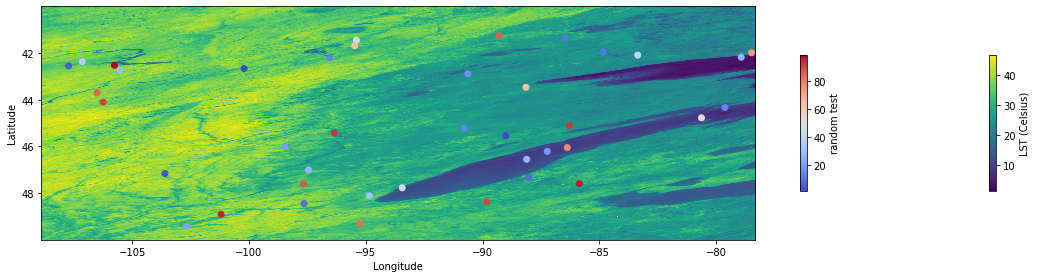

None


In [9]:
# create object
modisLST = geoParseModis.getModisLST_1km(MODIS_file=MODIS_files[0], prefix='Day', lats=lats, longs=longs)
modisLST.plotOverlap(zval=zval, z_label='random test')